In [6]:
import os
import numpy as np
os.chdir('/import/home2/yhchenmath/Code/ucs/')
# No warning
import warnings
import tifffile
import h5py
from skimage.segmentation import find_boundaries
import matplotlib.pyplot as plt
import numpy as np
warnings.filterwarnings('ignore')
from downstream.utils import read_json_to_namespace

config = read_json_to_namespace("./downstream/config/xenium_breast_cancer.json")

In [7]:
mask_dict = {}
for method in config.segmentation_results.keys():
    if os.path.exists(config.segmentation_results[method]):
        mask_dict[method] = tifffile.imread(config.segmentation_results[method])
    else:
        print(f"{method} mask not found")
        mask_dict[method] = None
boundary_dict = {}
for method in mask_dict.keys():
    if mask_dict[method] is not None:
        boundary_dict[method] = find_boundaries(mask_dict[method], mode='inner')
    else:
        boundary_dict[method] = None
he = tifffile.imread(config.he)
dapi = tifffile.imread(config.dapi)

gene_map = tifffile.imread(config.gene_map)
gene_map_sum = np.sum(gene_map, axis=2)

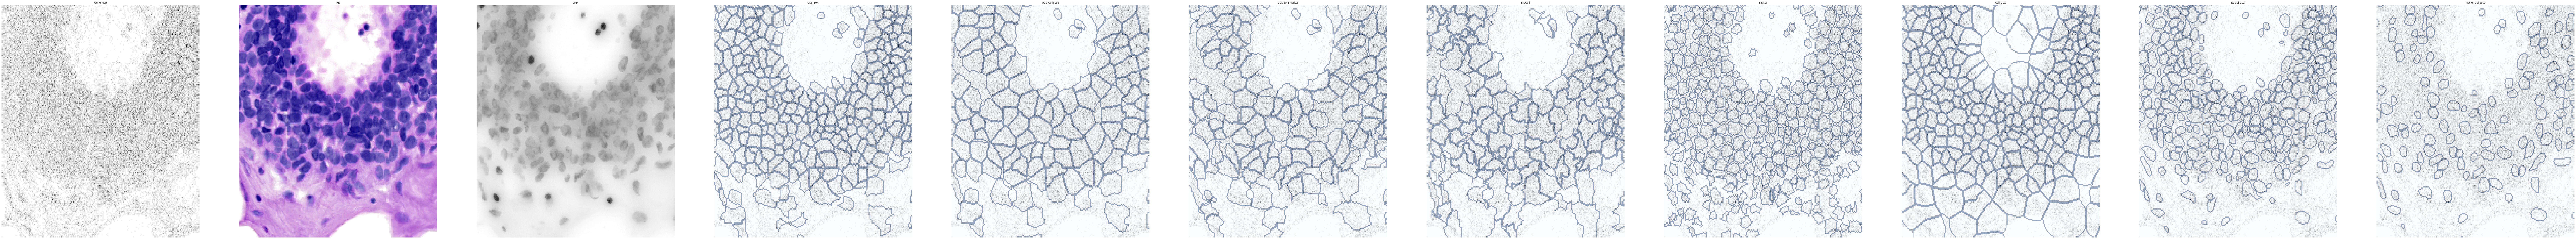

In [26]:
x_min, x_max, y_min, y_max = 4900,5100, 4100, 4300
fig, ax = plt.subplots(1, 3 + len(boundary_dict.keys()), figsize=(20 * (3 + len(boundary_dict.keys())), 20))
# All axis off
for a in ax:
    a.axis('off')
ax[0].imshow(gene_map_sum[x_min:x_max, y_min:y_max], aspect='auto', cmap='Greys')
ax[0].set_title('Gene Map')
ax[1].imshow(he[:, x_min:x_max, y_min:y_max].transpose(1, 2, 0), aspect='auto')
ax[1].set_title('HE')
ax[2].imshow(dapi[x_min:x_max, y_min:y_max], aspect='auto', cmap='binary')
ax[2].set_title('DAPI')

for i, method in enumerate(boundary_dict.keys()):
    ax[3 + i].imshow(boundary_dict[method][x_min:x_max, y_min:y_max], aspect='auto', cmap='Blues')
    ax[3 + i].imshow(gene_map_sum[x_min:x_max, y_min:y_max], aspect='auto', cmap='Greys', alpha=0.6)
    ax[3 + i].set_title(method)

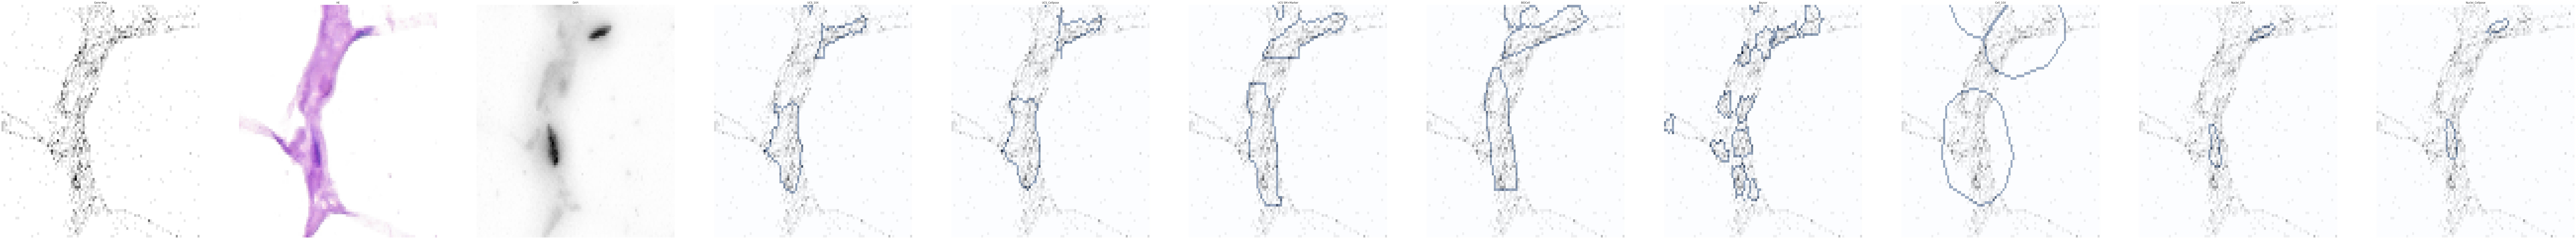

In [27]:
x_min, x_max, y_min, y_max = 4875, 4965, 3400, 3500
# Get Baysor boundary
fig, ax = plt.subplots(1, 3 + len(boundary_dict.keys()), figsize=(20 * (3 + len(boundary_dict.keys())), 20))
# All axis off
for a in ax:
    a.axis('off')
ax[0].imshow(gene_map_sum[x_min:x_max, y_min:y_max], aspect='auto', cmap='Greys')
ax[0].set_title('Gene Map')
ax[1].imshow(he[:, x_min:x_max, y_min:y_max].transpose(1, 2, 0), aspect='auto')
ax[1].set_title('HE')
ax[2].imshow(dapi[x_min:x_max, y_min:y_max], aspect='auto', cmap='binary')
ax[2].set_title('DAPI')

for i, method in enumerate(boundary_dict.keys()):
    ax[3 + i].imshow(boundary_dict[method][x_min:x_max, y_min:y_max], aspect='auto', cmap='Blues')
    ax[3 + i].imshow(gene_map_sum[x_min:x_max, y_min:y_max], aspect='auto', cmap='Greys', alpha=0.6)
    ax[3 + i].set_title(method)

## Bad Case

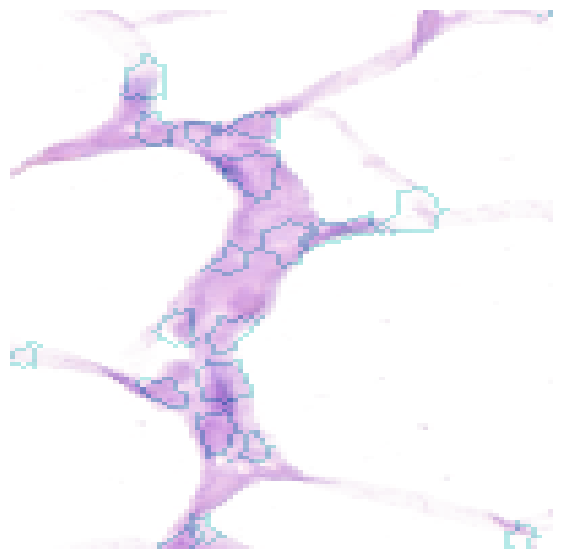

In [11]:
# Show baysor
import matplotlib.colors as mcolors
fig, ax = plt.subplots(1, 1, figsize=(7, 7))
ax.axis('off')
colors = ['white', '#0abab5']
cmap = mcolors.ListedColormap(colors)
ax.imshow(he[:, x_min:x_max, y_min:y_max].transpose(1, 2, 0), aspect='auto')
ax.imshow(boundary_dict["Baysor"][x_min:x_max, y_min:y_max], aspect='auto', cmap=cmap, alpha=0.3)

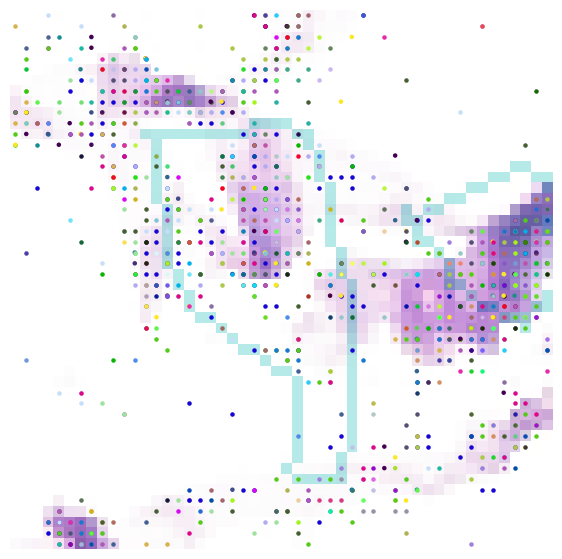

In [18]:
x_min, x_max, y_min, y_max = 5080, 5130, 5160, 5210
fig, ax = plt.subplots(1, 1, figsize=(7, 7))
ax.axis('off')
colors = ['white', '#0abab5']
cmap = mcolors.ListedColormap(colors)
ax.imshow(he[:, x_min:x_max, y_min:y_max].transpose(1, 2, 0), aspect='auto')
ax.imshow(boundary_dict["BIDCell"][x_min:x_max, y_min:y_max], aspect='auto', cmap=cmap, alpha=0.3)
np.random.seed(0)
for i in range(0, gene_map.shape[2]):
    ax.scatter(np.where(gene_map[x_min:x_max, y_min:y_max,i])[1], np.where(gene_map[x_min:x_max, y_min:y_max,i])[0], s=5, c=np.random.rand(3,))

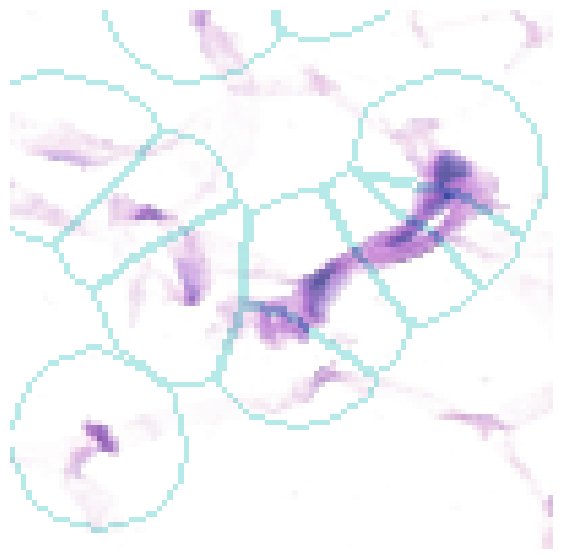

In [19]:
x_min, x_max, y_min, y_max = 5050, 5150, 5150, 5250
fig, ax = plt.subplots(1, 1, figsize=(7, 7))
ax.axis('off')
colors = ['white', '#0abab5']
cmap = mcolors.ListedColormap(colors)
ax.imshow(he[:, x_min:x_max, y_min:y_max].transpose(1, 2, 0), aspect='auto')
ax.imshow(boundary_dict["Cell_10X"][x_min:x_max, y_min:y_max], aspect='auto', cmap=cmap, alpha=0.3)

## UCS

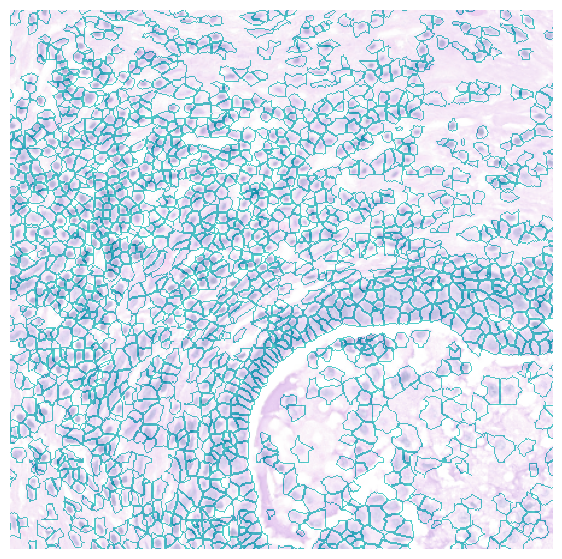

In [20]:
x_min, x_max, y_min, y_max = 3750, 4200, 5450, 5900
fig, ax = plt.subplots(1, 1, figsize=(7, 7))
ax.axis('off')
colors = ['white', '#0abab5']
cmap = mcolors.ListedColormap(colors)
ax.imshow(he[:, x_min:x_max, y_min:y_max].transpose(1, 2, 0), aspect='auto')
ax.imshow(boundary_dict["UCS_10X"][x_min:x_max, y_min:y_max], aspect='auto', cmap=cmap, alpha=0.7)